In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pickle
from tensorflow.keras.preprocessing import image
from PIL import Image

# Cargar el modelo
modelo = tf.keras.models.load_model('./modelo_completo.h5')

# Cargar el LabelEncoder
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

In [21]:
def load_test_image(image_path, img_size=(64, 64)):
    img = Image.open(image_path).convert('L')  # Escala de grises
    img = img.resize(img_size)  # Redimensionar a 64x64 píxeles
    img = np.array(img) / 255.0  # Normalizar
    return img.reshape(1, img_size[0], img_size[1], 1)  # Añadir batch dimension

In [24]:
test_image = load_test_image(r"C:/Users/tomif/Desktop/AI calculadora/extracted_images/9/9_33.jpg")

# Realizar predicción
prediccion = modelo.predict(test_image)

# Obtener la clase predicha
predicted_label = np.argmax(prediccion)

# Mostrar el resultado de la predicción
print(f'Predicción del modelo: {np.argmax(prediccion)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicción del modelo: 15


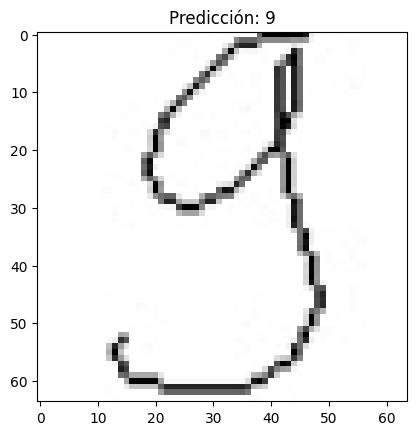

In [25]:
# Mostrar la imagen
plt.imshow(test_image.reshape(64, 64), cmap='gray')
plt.title(f"Predicción: {label_encoder.inverse_transform([predicted_label])[0]}")
plt.show()